## Exploratory Data Analysis
#### Let's say we've got a new dataset about books. Is this good data? What questions can it answer for us? It's only after we understand what our data contains that we can think about how the data might be useful to us. Exploratory Data Analysis, or EDA for short, is the process of cleaning and reviewing data to derive insights such as descriptive statistics and correlation and generate hypotheses for experiments. EDA results often inform the next steps for the dataset, whether that be generating hypotheses, preparing the data for use in a machine learning model, or even throwing the data out and gathering new data!

## A first look with .head()                                     
#### Let's begin by importing a dataset and reviewing some useful pandas methods for initial exploration! We'll import the books data from a csv file using pd.read_csv and save it as a DataFrame called "books". Taking a look at the top of the DataFrame using the head function, we can see that our data contains columns representing book names, authors, ratings, publishing years, and genres.

In [44]:
# importing liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
books = pd.read_csv(r"C:\Users\NEW USER\anaconda_projects\clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


## Gathering more .info()                                       
#### pandas also offers a quick way to summarize the number of missing values in each column, the data type of each column, and memory usage using the .info method. It looks like there are no missing values in our dataset, but it does have a variety of data types.

In [46]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


## A closer look at categorical columns                               
#### A common question about categorical columns in a dataset is how many data points we have in each category. For example, perhaps we're interested in the genres represented in our books data. We can select the genre column and use the pandas Series method .value_counts to find the number of books with each genre.

In [47]:
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

## .describe() numerical columns
#### Gaining a quick understanding of data included in numerical columns is done with the help of the DataFrame.describe method. Calling .describe on books, we see that it returns the count, mean, and standard deviation of the values in each numerical column (in this case rating and year), along with the min, max, and quartile values.

In [48]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


## Visualizing numerical data
#### Histograms are a classic way to look at the distribution of numerical data by splitting numerical values into discrete bins and visualizing the count of values in each bin. Throughout this course, we'll use Seaborn to explore datasets visually. Seaborn is imported as s-n-s. We'll also import matplotlib.pyplot aliased as plt. To create a histogram, we'll use sns.histplot and pass the books DataFrame as the data argument. Next, we indicate which column we'd like to use as x by passing the column name rating to the x keyword argument. After running plt.show to display the plot, we see that most books received ratings above 4.4, with very few getting ratings below 4.0. However, the bin size here is a little awkward. Ideally, we would have a bin for each tenth of a rating, such as a single bin for scores greater than 4.5 to 4.6 inclusive.

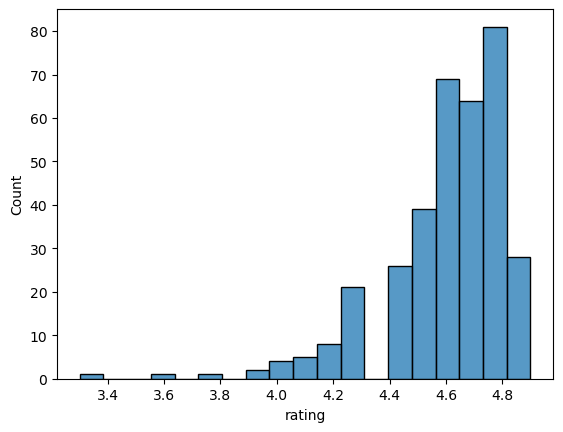

In [49]:
sns.histplot(data = books, x= "rating")
plt.show()

## Adjusting bin width
#### We can set a bin width of 0.1 using the binwidth keyword argument. That's better!

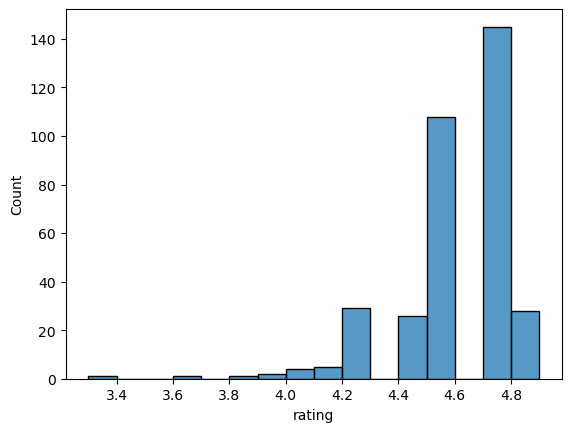

In [50]:
sns.histplot(data = books, x= "rating", binwidth = .1)
plt.show()

## Data validation
#### Data validation is an important early step in EDA. We want to understand whether data types and ranges are as expected before we progress too far in our analysis! Let's dive in.

In [51]:
books.info()
books.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

## Validating data types
#### We learned in the last lesson that dot-info gives a quick overview of data types included in a dataset along with other information such as the number of non-missing values. We can also use the DataFrame dot-dtypes attribute if we're only interested in data types. But what if we aren't happy with these data types? Here, the year column in the books DataFrame is stored as a float, which doesn't make sense for year data, which should always be a whole number.

In [52]:
books["year"]=books["year"].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int32
genre      object
dtype: object

## Validating categorical data
#### We can validate categorical data by comparing values in a column to a list of expected values using dot-isin, which can either be applied to a Series as we'll show here or to an entire DataFrame. Let's check whether the values in the genre column are limited to "Fiction" and "Non Fiction" by passing these genres as a list of strings to dot-isin. The function returns a Series of the same size and shape as the original but with True and False in place of all values, depending on whether the value from the original Series was included in the list passed to dot-isin. We can see that some values are False.

In [53]:
books["genre"].isin(["Fiction", "Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

## Validating categorical data
#### We can also use the tilde operator at the beginning of the code block to invert the True/ False values so that the function returns True if the value is NOT in the list passed to dot-isin.

In [54]:
~books["genre"].isin(["Fiction", "Non Fiction"])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

## Validating categorical data
#### And if we're interested in filtering the DataFrame for only values that are in our list, we can use the isin code we just wrote to filter using Boolean indexing!

In [55]:
books[books["genre"].isin(["Fiction", "Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


## Validating numerical data
#### Let's now validate numerical data. We can select and view only the numerical columns in a DataFrame by calling the select_dtypes method and passing "number" as the argument.

In [56]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


## Validating numerical data
#### Perhaps we'd like to know the range of years in which the books in our dataset were published. We can check the lowest and highest years by using the dot-min and dot-max functions, respectively. And we can view a more detailed picture of the distribution of year data using Seaborn's boxplot function. The boxplot shows the boundaries of each quartile of year data: as we saw using min and max, the lowest year is 2009 and the highest year is 2019. The 25th and 75th percentiles are 2010 and 2016 and the median year is 2013.

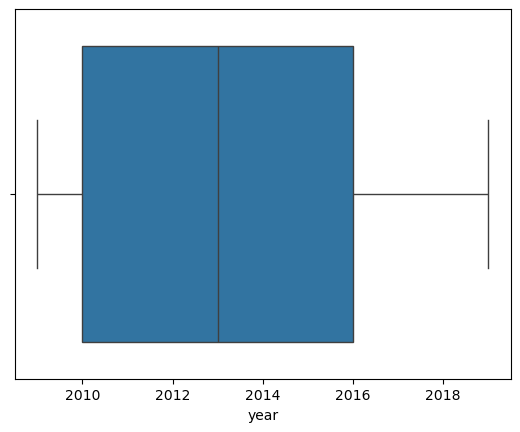

In [57]:
books["year"].min()
books["year"].max()
sns.boxplot(data=books, x="year")
plt.show()

## Validating numerical data
#### We can also view the year data grouped by a categorical variable such as genre by setting the y keyword argument. It looks like the children's books in our dataset have slightly later publishing years in general, but the range of years is the same for all genres.

## Validating numerical data
#### We can also view the year data grouped by a categorical variable such as genre by setting the y keyword argument. It looks like the children's books in our dataset have slightly later publishing years in general, but the range of years is the same for all genres.

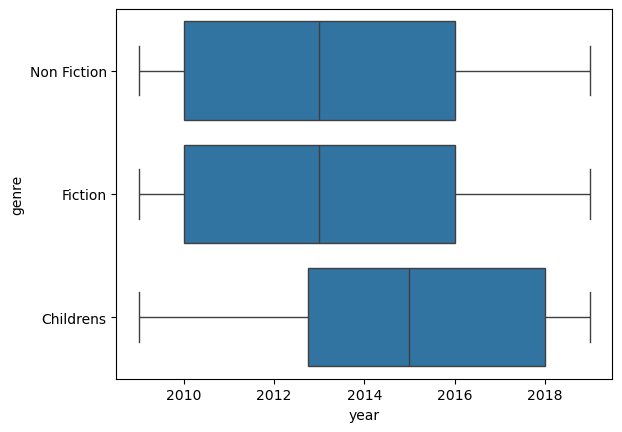

In [58]:
sns.boxplot(data=books, x="year", y="genre")
plt.show()

#### Handling Outliers

   Working_Year                 Designation Experience Employment_Status  \
0          2020              Data Scientist        Mid                FT   
1          2020  Machine Learning Scientist     Senior                FT   
2          2020           Big Data Engineer     Senior                FT   
3          2020        Product Data Analyst        Mid                FT   
4          2020   Machine Learning Engineer     Senior                FT   

  Employee_Location Company_Size  Remote_Working_Ratio  Salary_USD  
0                DE            L                     0     76227.0  
1                JP            S                     0    248257.0  
2                GB            M                    50    104100.0  
3                HN            S                     0     19097.0  
4                US            L                    50    143225.0  
       Working_Year  Remote_Working_Ratio     Salary_USD
count    607.000000             607.00000     607.000000
mean    2021.40

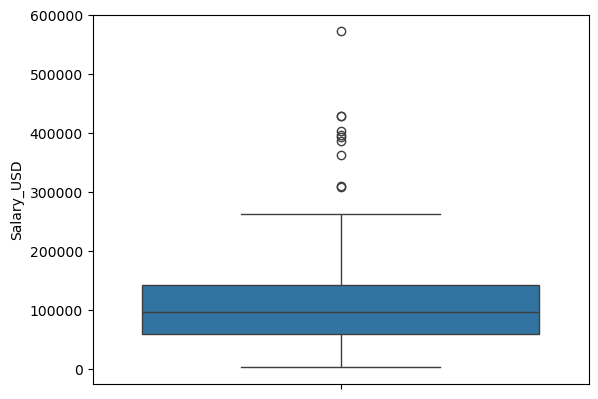

83332.0
-65105.0 268223.0
    Experience Employee_Location  Salary_USD
25   Executive                US    310321.0
33         Mid                US    429675.0
63      Senior                US    393392.0
97         Mid                US    429675.0
157        Mid                US    403895.0
225  Executive                US    397211.0
252  Executive                US    572900.0
482  Executive                US    309366.0
519     Senior                US    362837.0
523     Senior                US    386708.0
       Working_Year  Remote_Working_Ratio     Salary_USD
count    597.000000            597.000000     597.000000
mean    2021.412060             70.686767  102328.480737
std        0.688634             40.797800   55910.790653
min     2020.000000              0.000000    2730.000000
25%     2021.000000             50.000000   59819.000000
50%     2022.000000            100.000000   95483.000000
75%     2022.000000            100.000000  141565.000000
max     2022.000000    

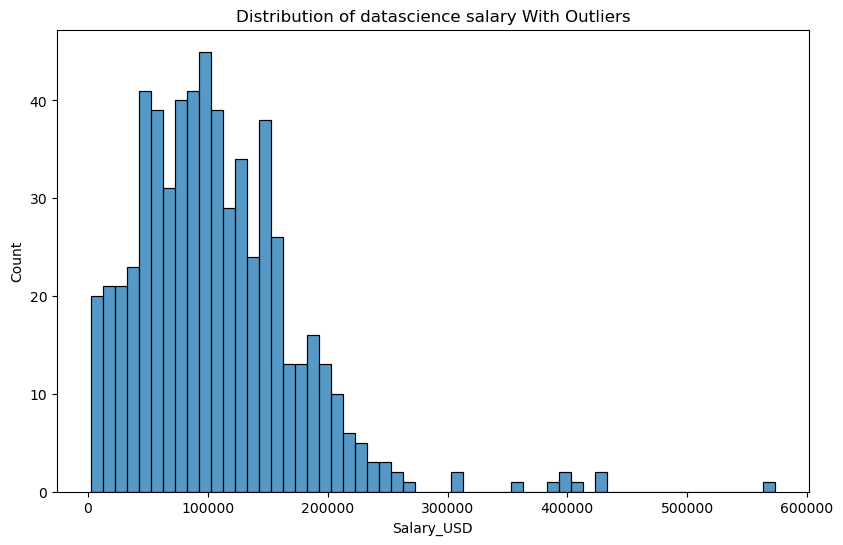

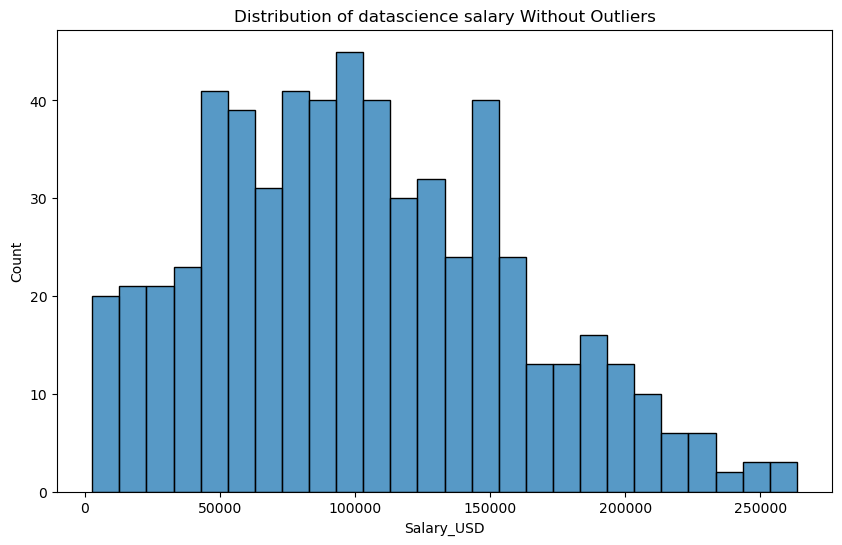

In [59]:
# import dataframe
datascience = pd.read_csv(r"C:\Users\NEW USER\anaconda_projects\ds_salaries_clean.csv")
print(datascience.head())

# Using describe stat function
print(datascience.describe())

# IQR in boxplot
sns.boxplot(data=datascience, y="Salary_USD")
plt.show()

# Identifying thresholds
twenty_fifth = datascience["Salary_USD"].quantile(0.25)
seventy_fifth = datascience["Salary_USD"].quantile(0.75)
salaries_iqr = seventy_fifth - twenty_fifth
print(salaries_iqr)
lower_threshold = twenty_fifth - 1.5 * salaries_iqr
upper_threshold = seventy_fifth + 1.5 * salaries_iqr
print(lower_threshold , upper_threshold)

# Subsetting data with outliers
datascience_with_outliers = datascience[(datascience["Salary_USD"] < lower_threshold) | 
                            (datascience["Salary_USD"] > upper_threshold)]\
                            [["Experience", "Employee_Location", "Salary_USD"]]
print(datascience_with_outliers)

# Subsetting data without outliers
datascience_no_outliers = datascience[(datascience["Salary_USD"] > lower_threshold) & (datascience["Salary_USD"] < upper_threshold)]
print(datascience_no_outliers.describe())

# Distribution with outliers
plt.figure(figsize=(9.7,6))
sns.histplot(data=datascience, binwidth=10000, x="Salary_USD")
plt.title("Distribution of datascience salary With Outliers")
plt.show()

# Distribution without outliers
plt.figure(figsize=(10,6))
sns.histplot(data=datascience_no_outliers, binwidth=10000, x="Salary_USD")
plt.title("Distribution of datascience salary Without Outliers")
plt.show()

##### From the descriptive statistics; the maximum salary is more than four times the mean and median.These Seems extreme.!
##### From the IQR in box plot; the percentiles are included in box plots, like the one showing salaries of data professionals. The box contains percentiles, and observations considered to be outliers are represented as dblack round circles outside of the box.
##### The detection of outliers is an important part of our exploratory data analysis because; These are extreme values and may not accurately represent the data. Additionally, they can skew the mean and standard deviation. If we plan to perform statistical tests or build machine learning models, these will often require data that is normally distributed and not skewed!                  
##### The detection of outliers is an important part of our exploratory data analysis because; These are extreme values and may not accurately represent the data. Additionally, they can skew the mean and standard deviation. If we plan to perform statistical tests or build machine learning models, these will often require data that is normally distributed and not skewed!    

### Histograms, boxplots, and descriptive statistics are also useful methods for identifying extreme values. 

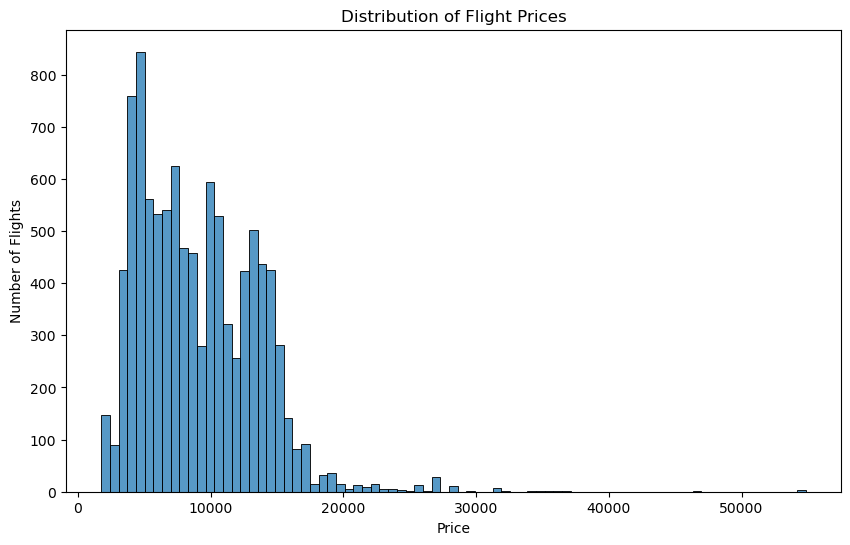

count      10446
unique       367
top       2h 50m
freq         532
Name: Duration, dtype: object
7096.25
count     9959.000000
mean      8875.160860
std       4057.202002
min       1759.000000
25%       5228.000000
50%       8283.000000
75%      12284.000000
max      23001.000000
Name: Price, dtype: float64


In [60]:
# Import dataframe
planes = pd.read_csv(r"C:\Users\NEW USER\anaconda_projects\planes.csv")

# Plot a histogram of flight prices
plt.figure(figsize=(10,6))
sns.histplot(data=planes, x="Price")
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Number of Flights")
plt.show()

# Display descriptive statistics for flight duration
print(planes["Duration"].describe())

# To remove outliers; calculate the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth
print(prices_iqr)

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]
print(planes["Price"].describe())

##### Originally the dataset had a maximum price of almost 55000, but the output of planes.describe() shows the maximum has been reduced to around 23000, reflecting a less skewed distribution for analysis!

### DateTime data                                                                                                                 A divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce.

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration             int64
num_kids                    float64
dtype: object


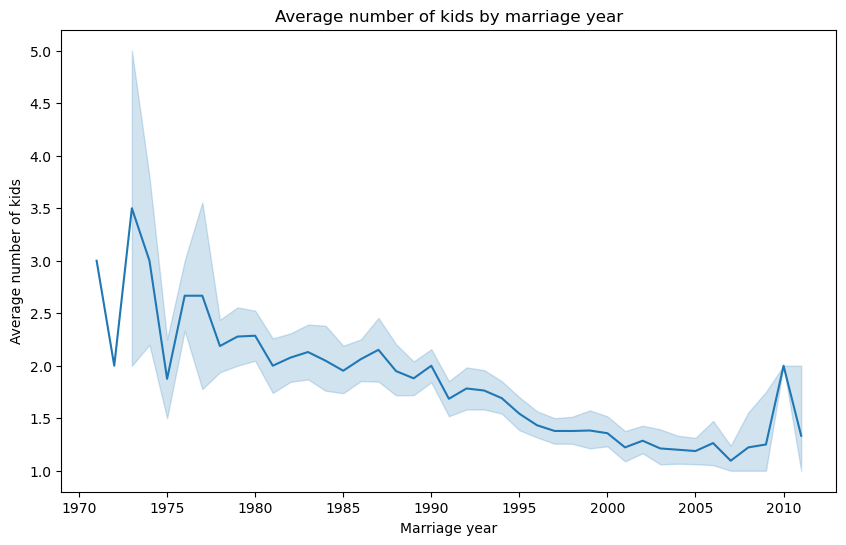

In [61]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv(r"C:\Users\NEW USER\anaconda_projects\divorce.csv", parse_dates=["divorce_date","dob_man","dob_woman","marriage_date"])
print(divorce.dtypes)

# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
plt.figure(figsize=(10,6))
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.title("Average number of kids by marriage year")
plt.xlabel("Marriage year")
plt.ylabel("Average number of kids")
plt.show()

##### it looks like couples who had later marriage years also had fewer children during their marriage